<a href="https://colab.research.google.com/github/meetsomto/diabetes_prediction/blob/code/diabetes_prediction_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification using Tensorflow: Predict Whether or not a Patient has Diabetes**

## **Data Description** 
### This data contains information from female patients who were at least 21 years old and of Pima Indian heritage.
**Source**: [Kaggle - Pima Indians Diabetes](https://terry-bluedata.s3.amazonaws.com/ML+OPs+Demos/TensorFlow+-+Diabetes+Prediction/Data/pima-indians-diabetes.csvhttps://terry-bluedata.s3.amazonaws.com/ML+OPs+Demos/TensorFlow+-+Diabetes+Prediction/Data/pima-indians-diabetes.csv) 


### 9 columns
### 1 binary tаrgеt variable: Outcome 
### 8 independent medical features that аrе either integers or float (and interval or ratio levels)

## **Columns**:
### **Pregnancies**: Count

### **Glucose**: The blood plasma glucose concentration after a 2 hour oral glucose tolerance test. 

### **BloodPressure**: Diastolic blood pressure (mm/HG).

### **SkinThickness**: Skinfold thickness of the triceps (mm).

### **Insulin**: 2 hour serum insulin (mu U/ml).

### **BMI**: Body mass index (kg/m squared)

### **DiabetesPedigreeFunction**: A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes

### **Age**: Age

### **Outcome**: whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no).




## Import Packages

In [3]:
# import tensorflow as tf

# API to run TF
from keras.models import Sequential 
from keras.layers import Dense

import pandas as pd # ETL
import numpy as np # array operations
import matplotlib.pyplot as plt # visualization of data and training history
import os # system i/o


## Import Data

In [4]:
#connect to google drive if data is hosted on drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# List datasets in mounted drive
print(os.listdir('/content/drive/My Drive/Drive_Datasets'))

['ml-olympiad-good-health-and-well-being', 'diabetes.csv']


In [30]:
# Import and load data

# from google drive
df = pd.read_csv("/content/drive/My Drive/Drive_Datasets/diabetes.csv")
# train = pd.read_csv('diabetes.csv')  ## Direct Upload
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Further Data Exploration

In [18]:
df.shape # count of rows and columns

(768, 9)

In [19]:
df.nunique().sort_values(ascending=True)  # Uniqueness and sort by ascending order of uniqueness of values

Outcome                       2
Pregnancies                  17
BloodPressure                47
SkinThickness                51
Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64

In [20]:
df.info() # data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


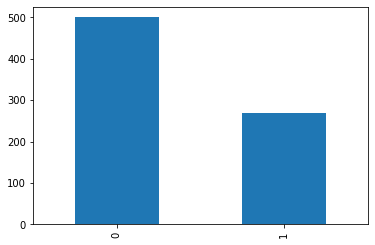

In [13]:
# Check balance of class values in target column
df['Outcome'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f4b66c950>,
      dtype=object)

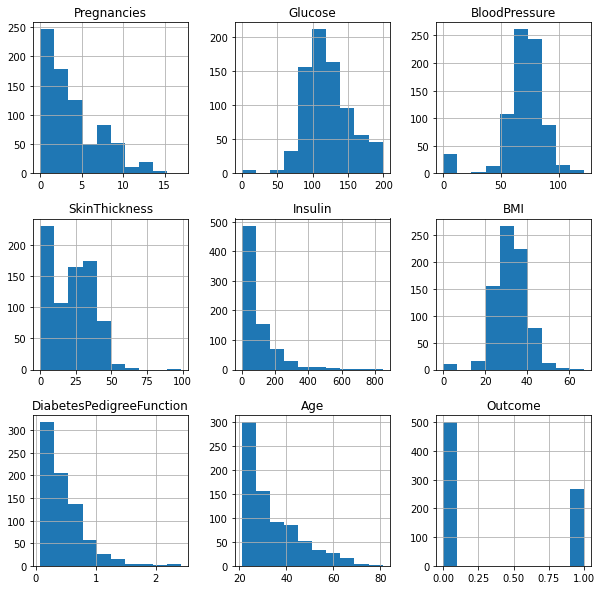

In [14]:
# Quick survey of data in each column
df.hist(figsize=(10,10))

## Specify target (output)  and predictor (input) variables

In [16]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']] 
Y = df['Outcome']

print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [32]:
# OR 
X = df.iloc[:,0:8]
Y = df.iloc[:,8]

In [21]:
# OR SIMPLY drop the target column (and any other column you wish to drop from predictors)

X = df.drop(['Outcome'], axis=1)
Y = df['Outcome']

In [33]:
print(X.columns) 
X.head()


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [34]:
Y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Define layers and Build Model using Keras (runs on tf)

In [51]:
input = X
output = Y
print('Data split completed. Output and input variables defined')

Data split completed. Output and input variables defined


In [49]:

print('Define model layers...')
model = Sequential()  # instantiate neural network sequence of layers

# define visible input layer for 8 input nodes,
# relu activation function to create first hidden layer of 12 nodes
model.add(Dense(12, input_dim=8, kernel_initializer='random_uniform', activation='relu')) 

# Hidden layer of 8 nodes to feed output layer
model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))

# Output layer of 1 node
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
print('Model layers defined')

Define model layers...
Model layers defined


In [50]:
# compile model and ready for training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Model compiled')

Model compiled


In [52]:
# train (fit)  model using 600 epochs, 30% val split for train,test
# save history to plot metrics later
history = model.fit(input, output, validation_split=0.33, epochs=600, batch_size=10, verbose=2)

Epoch 1/600
52/52 - 1s - loss: 0.6812 - accuracy: 0.6401 - val_loss: 0.6638 - val_accuracy: 0.6732 - 882ms/epoch - 17ms/step
Epoch 2/600
52/52 - 0s - loss: 0.6632 - accuracy: 0.6381 - val_loss: 0.6486 - val_accuracy: 0.6732 - 154ms/epoch - 3ms/step
Epoch 3/600
52/52 - 0s - loss: 0.6561 - accuracy: 0.6440 - val_loss: 0.6433 - val_accuracy: 0.6772 - 159ms/epoch - 3ms/step
Epoch 4/600
52/52 - 0s - loss: 0.6477 - accuracy: 0.6440 - val_loss: 0.6424 - val_accuracy: 0.6772 - 126ms/epoch - 2ms/step
Epoch 5/600
52/52 - 0s - loss: 0.6415 - accuracy: 0.6479 - val_loss: 0.6294 - val_accuracy: 0.6969 - 161ms/epoch - 3ms/step
Epoch 6/600
52/52 - 0s - loss: 0.6357 - accuracy: 0.6556 - val_loss: 0.6261 - val_accuracy: 0.6732 - 138ms/epoch - 3ms/step
Epoch 7/600
52/52 - 0s - loss: 0.6265 - accuracy: 0.6809 - val_loss: 0.6085 - val_accuracy: 0.6732 - 154ms/epoch - 3ms/step
Epoch 8/600
52/52 - 0s - loss: 0.6271 - accuracy: 0.6576 - val_loss: 0.6024 - val_accuracy: 0.6890 - 131ms/epoch - 3ms/step
Epoch 9

## Performance Evaluation

In [53]:
# List metric keys in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [114]:

history.history['accuracy']

[0.6400778293609619,
 0.6381322741508484,
 0.6439688801765442,
 0.6439688801765442,
 0.6478599309921265,
 0.655642032623291,
 0.6809338331222534,
 0.6575875282287598,
 0.6926069855690002,
 0.6945525407791138,
 0.6964980363845825,
 0.698443591594696,
 0.6926069855690002,
 0.7042801380157471,
 0.7120622396469116,
 0.7062256932258606,
 0.7023346424102783,
 0.7178988456726074,
 0.7101167440414429,
 0.7101167440414429,
 0.7120622396469116,
 0.7140077948570251,
 0.7178988456726074,
 0.7237353920936584,
 0.7354085445404053,
 0.7373540997505188,
 0.725680947303772,
 0.7431906461715698,
 0.7237353920936584,
 0.7334630489349365,
 0.7217898964881897,
 0.731517493724823,
 0.7392995953559875,
 0.7334630489349365,
 0.725680947303772,
 0.725680947303772,
 0.7295719981193542,
 0.7159532904624939,
 0.7334630489349365,
 0.731517493724823,
 0.7334630489349365,
 0.7354085445404053,
 0.7140077948570251,
 0.7217898964881897,
 0.7276264429092407,
 0.7198443412780762,
 0.7373540997505188,
 0.7451362013816833,

## Model Evaluation

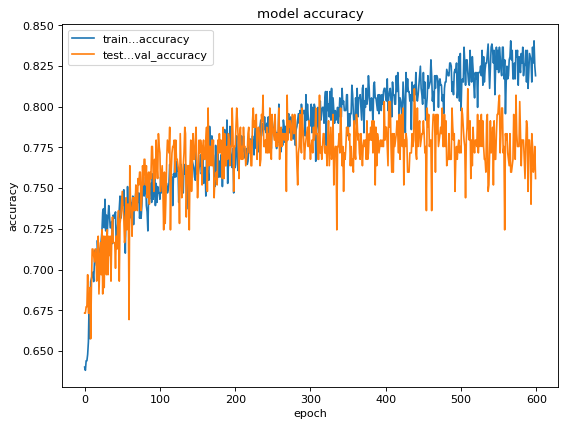

<Figure size 432x288 with 0 Axes>

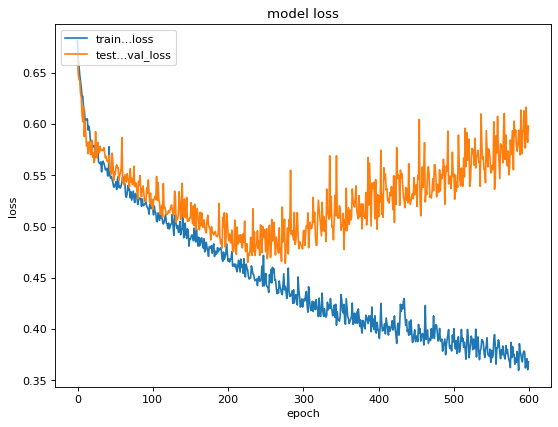

<Figure size 432x288 with 0 Axes>

In [116]:
_  # summarize history for accuracy

fig = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['accuracy'])


plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train...accuracy', 'test...val_accuracy'], loc='upper left')
plt.show()
plt.savefig('accuracy.png')

# summarize history for loss
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train...loss', 'test...val_loss'], loc='upper left')
plt.show()
plt.savefig('loss.png')


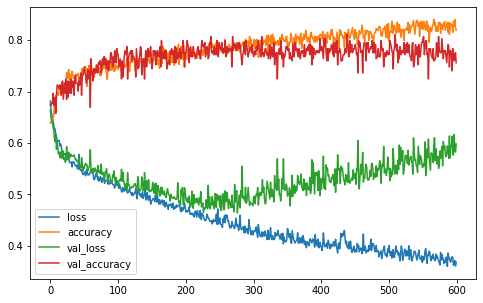

<Figure size 432x288 with 0 Axes>

In [117]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()
plt.savefig('history.png')

In [127]:
model.metrics_names

['loss', 'accuracy']

In [130]:
scores = model.evaluate(input, output)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.8112

accuracy: 81.12%


In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
lss = history.history['loss']
val_lss = history.history['val_loss']

print('accuracy- ',  'max: ', np.max(acc), '\t min: ', np.min(acc), '\t mean: ', np.mean(acc))

print('\nval_accuracy- ',  'max: ', np.max(val_acc), '\t min: ', np.min(val_acc), '\t mean: ', np.mean(val_acc))

print('\nloss- ',  'max: ', np.max(lss), '\t min: ', np.min(lss), '\t mean: ', np.mean(lss))

print('\nval_loss- ',  'max: ', np.max(val_lss), '\t min: ', np.min(val_lss), '\t mean: ', np.mean(val_lss))

accuracy-  max:  0.8404669165611267 	 min:  0.6381322741508484 	 mean:  0.7841926094889641

val_accuracy-  max:  0.8110235929489136 	 min:  0.6574802994728088 	 mean:  0.7680577331781387

loss-  max:  0.6811628341674805 	 min:  0.35980716347694397 	 mean:  0.44826841821273167

val_loss-  max:  0.6638144850730896 	 min:  0.46410197019577026 	 mean:  0.5306182083984216


In [128]:
model.weights

[<tf.Variable 'dense_10/kernel:0' shape=(8, 12) dtype=float32, numpy=
 array([[-8.55569959e-01,  2.69557182e-02, -1.68162003e-01,
          1.87530853e-02,  4.23459262e-01,  3.84612501e-01,
          8.07453990e-01, -6.42771244e-01, -8.46931279e-01,
         -5.51918209e-01, -4.21183854e-02,  3.20371091e-01],
        [ 5.12004569e-02, -1.01217911e-01, -2.77777389e-02,
         -5.64207882e-03, -2.61524878e-02, -1.15377508e-01,
         -1.64664134e-01,  2.22626440e-02, -7.66829252e-02,
         -1.11744277e-01,  1.26209611e-03,  1.45423278e-01],
        [ 1.61430687e-01,  3.29137594e-01,  2.87171844e-02,
         -2.29677092e-02, -1.07744306e-01,  2.57580459e-01,
          1.13891318e-01,  3.16172503e-02, -1.05428532e-01,
         -5.63709997e-02,  6.50734305e-02, -1.24104343e-01],
        [-1.27733555e-02,  2.89800251e-03,  7.61097223e-02,
          2.59694196e-02, -5.87155223e-02, -3.28628391e-01,
          1.14595577e-01,  2.46663436e-01,  2.42679164e-01,
          4.54358220e-01,  

## Visualize keras model layers

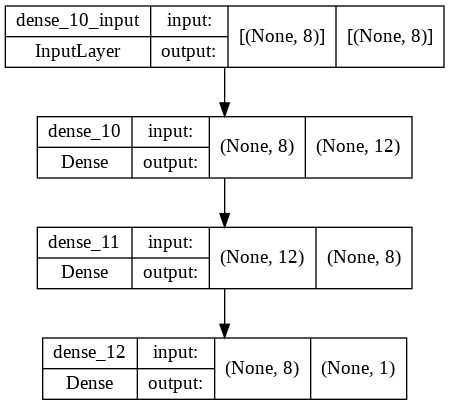

In [115]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [118]:
# save model for future deployment

# saved in the Hierarchical Data Format (HDF).
model.save('diabetes.h5')


In [133]:
# or preserve as pickle object
import pickle
with open('diabetes_model.pkl', 'ab') as pickle_file:
  pickle.dump(model, pickle_file) 
  pickle_file.close()

INFO:tensorflow:Assets written to: ram://f9ebe9c4-d6ab-4abc-8c71-4a2737a7e61b/assets


# Load saved model for prediction

In [119]:
from keras.models import load_model

model = load_model('diabetes.h5')


## Sample prediction

In [131]:
predict_y = np.array([[1, 126, 60, 0, 0, 30.1, 0.349, 47]])

predictions = model.predict(predict_y)
rounded = [round(output[0]) for output in predictions]

print(rounded)

[1]


In [151]:
import tensorflow as tf

class_ids = ["No", "Yes"]

predict_y = tf.convert_to_tensor([
    [6.0   , 148.0   ,  72.0   ,  35.0   ,   0.0   ,  33.6  ,   0.627,    50.0   ,],
    [61.0   , 18.0   ,  10.0   ,  65.0   ,   0.0   ,  12.6  ,   0.927,    55.0   ,],
    [40.   , 110.0  ,  92.0   ,   0.0  ,   0.0  ,  37.6  ,   0.191, 30.0    ,],
    [1.0   , 126.0   , 60.0   , 0.   , 0.   , 30.1   , 0.349   , 47   ]
])

prediction = model(predict_y)

for i, logits in enumerate(prediction):

    class_idx = tf.keras.backend.argmax(
    logits,
    axis=-1
)
    name = class_ids[class_idx]
    print("Example {} prediction: {}".format(i, name))


Example 0 prediction: No
Example 1 prediction: No
Example 2 prediction: No
Example 3 prediction: No


## Credits

*   [Edward Leoni](https://medium.com/edward-leoni/using-machine-learning-to-predict-if-someone-has-diabetes-21dc52118d8f)

*   [RATNESH KUSHWAHA](https://www.kaggle.com/ratnesh88/predict-diabetes-using-tensor-flow/notebook) 


*   [Terry Chiang, Nanda Vijaydev, and Chris Snow](https://docs.containerplatform.hpe.com/53/reference/epic/working-with-ai-ml/tutorials/Tutorial_2_Diabetes_Prediction.html)




